In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
df=pd.read_csv(r"C:\Users\sripa\OneDrive\Desktop\salaries.csv")
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [28]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['company_n'] = le.fit_transform(df['company'])
df['job_n'] = le.fit_transform(df['job'])
df['degree_n'] = le.fit_transform(df['degree'])
df['salary_more_then_100k_n'] = le.fit_transform(df['salary_more_then_100k'])

In [29]:
df = df.drop(['company','job','degree','salary_more_then_100k'], axis=1)
df

,company_n,job_n,degree_n,salary_more_then_100k_n
0,2,2,0,0
1,2,2,1,0
2,2,0,0,1
3,2,0,1,1
4,2,1,0,0
5,2,1,1,1
6,0,2,1,0
7,0,1,0,0
8,0,0,0,0
9,0,0,1,1


In [30]:
x=df.iloc[:,:3]
x

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [31]:
y=df.iloc[:,-1]
y

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k_n, dtype: int64

In [32]:
# from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(11, 3) (5, 3)
(11,) (5,)


In [33]:

# from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=5, min_samples_split=2)

In [34]:
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

In [35]:
 y_pred=model.predict(x_test)
 y_pred

array([0, 0, 0, 1, 1])

In [36]:
# from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)
print("The accuracy is {:.2f}".format(accuracy))
print("\nConfusion Matrix:")
print(cm)
print("\nClassification Report:")
print(cr)

The accuracy is 0.80

Confusion Matrix:
[[2 0]
 [1 2]]

Classification Report:
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.67      0.80         3

    accuracy                           0.80         5
   macro avg       0.83      0.83      0.80         5
weighted avg       0.87      0.80      0.80         5



Text(50.722222222222214, 0.5, 'Truth')

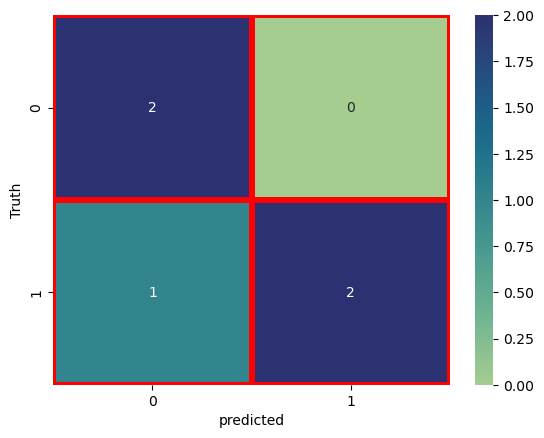

In [37]:
# import seaborn as sns
# import matplotlib.pyplot as plt
sns.heatmap(cm, annot=True,cmap='crest',linecolor='red',linewidths=4)
plt.xlabel("predicted")
plt.ylabel("Truth")

In [38]:
model.score(x_test,y_test)

0.8

In [39]:
print(model.predict([[0,2,1]]))

[0]


C:\Users\sripa\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [40]:
 print(model.predict([[2,2,2]]))

[0]


C:\Users\sripa\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


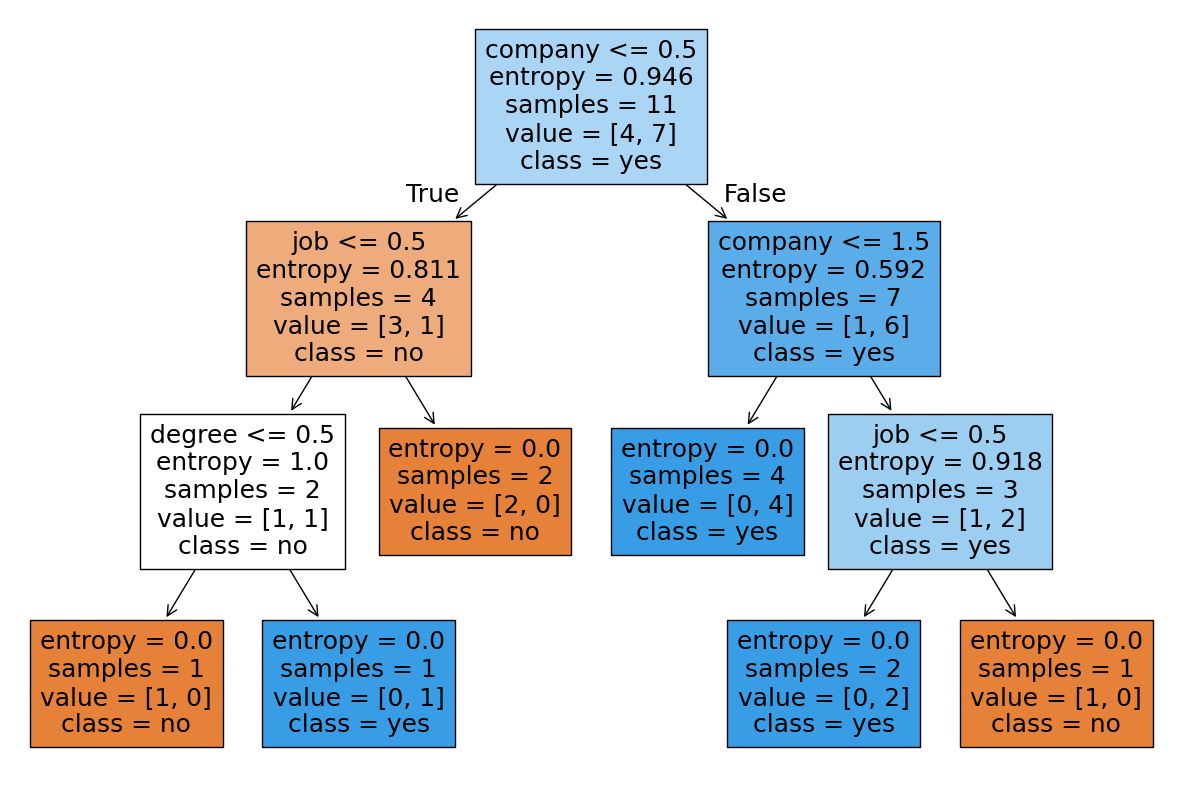

In [41]:
plt.figure(figsize=(15,10))
tree.plot_tree(
    model,
    feature_names=['company','job','degree'],
    class_names=['no', 'yes'],
    filled=True
)
plt.show()